In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,None,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",None,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China


In [3]:
print(df.Sport.value_counts())

Athletics                38596
Gymnastics               26703
Swimming                 23052
Shooting                 11432
Cycling                  10859
Fencing                  10731
Rowing                   10594
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6547
Equestrianism             6344
Canoeing                  6169
Boxing                    6046
Speed Skating             5613
Ice Hockey                5516
Hockey                    5400
Biathlon                  4893
Basketball                4526
Weightlifting             3926
Water Polo                3836
Judo                      3799
Handball                  3665
Art Competitions          3576
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1436
Nordic C

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


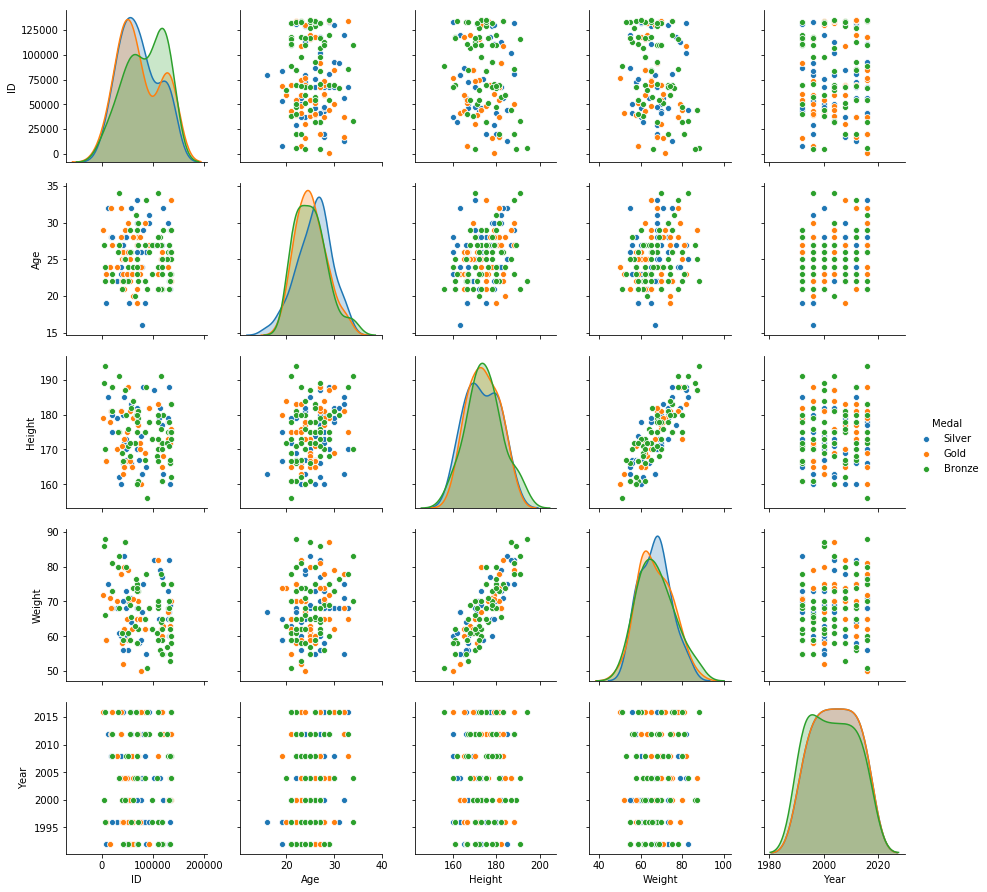

In [4]:
df2 = df.loc[(df.Sport=='Badminton') & (df.Medal!='None')]
sb.pairplot(df2, hue='Medal')

In [5]:
df = df2

x = df[['Height', 'Weight']].values
y = df['Medal'].values

std = StandardScaler()
le = LabelEncoder()

x_std = std.fit_transform(x)
y = le.fit_transform(y)

print(x_std[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[ 0.89128183  0.09251237]
 [ 0.89128183  0.09251237]
 [ 0.89128183  0.71958631]
 [ 1.7957255   1.72290461]
 [ 1.7957255   1.72290461]
 [ 0.63286935  0.09251237]
 [-0.52998679  0.34334195]
 [ 0.89128183  1.34666025]
 [ 0.89128183  1.34666025]
 [ 0.89128183  1.34666025]]
[2 1 0 0 1 2 1 2 1 1]


In [6]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Accuracy: 0.255


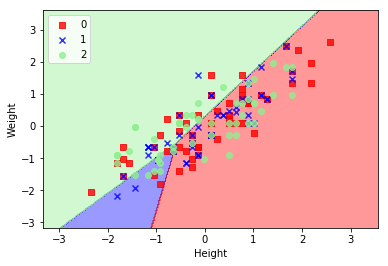

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.255


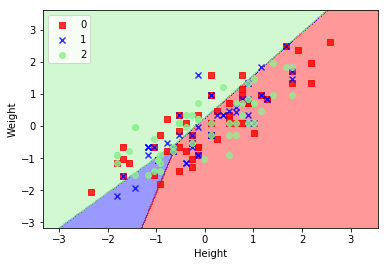

In [8]:
lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.255


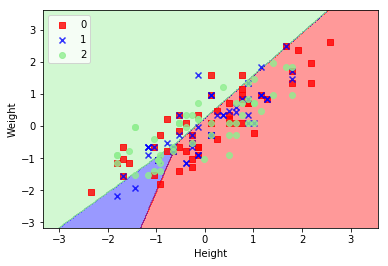

In [9]:
lr = LogisticRegression(C=50.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.255


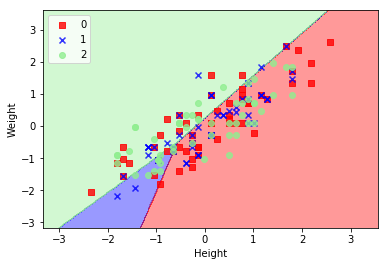

In [10]:
lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.255


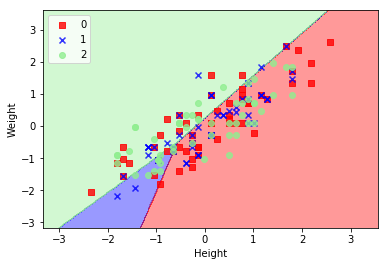

In [11]:
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

In [12]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[1 28.0 181.0 68.0 0 2008 0 3 0 0]
 [1 32.0 181.0 68.0 0 2012 0 4 0 0]
 [1 22.0 181.0 73.0 0 2008 0 3 0 1]
 [1 23.0 188.0 81.0 0 2012 0 4 0 1]
 [1 27.0 188.0 81.0 0 2016 0 5 0 1]
 [1 22.0 179.0 68.0 0 1996 0 1 0 1]
 [0 24.0 170.0 70.0 0 2008 0 3 0 3]
 [1 24.0 181.0 78.0 0 2008 0 3 0 0]
 [1 28.0 181.0 78.0 0 2012 0 4 0 0]
 [1 32.0 181.0 78.0 0 2016 0 5 0 0]]
[2 1 0 0 1 2 1 2 1 1]


In [13]:
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.353


In [14]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

ley = LabelEncoder()   
y = ley.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

print(x_train[:10])
print(y_train[:10])

[[ 1.         -1.00704155  2.57096293  2.60080812 -0.72546651  1.5
   0.          1.          0.         -0.62279526]
 [ 1.          1.07795997  0.1160444   0.97041588 -1.0412136  -1.5
   0.         -0.5         0.         -1.33943638]
 [-1.         -1.00704155 -0.40078055 -0.78539114 -1.0412136  -1.5
   0.         -0.5         0.          1.5271281 ]
 [-1.         -0.70918419  0.24525064  0.34334195 -1.0412136   0.
   0.         -1.5         0.          0.81048698]
 [-1.          1.07795997 -0.14236807 -0.91080593 -1.0412136   1.5
   0.          1.          0.          0.09384586]
 [-1.          0.18438789  0.1160444  -0.28373199 -1.0412136  -0.5
   0.          1.5         0.          1.5271281 ]
 [ 1.          0.48224525  1.7957255   1.72290461 -1.0412136   1.5
   0.          1.          0.         -0.62279526]
 [-1.         -0.11346947 -0.65919303 -0.78539114 -1.0412136   0.
   0.         -1.5         0.          0.81048698]
 [ 1.         -1.90061362  0.76207559  0.8450011   1.16901

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
%%time
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.373
CPU times: user 2.45 ms, sys: 1.62 ms, total: 4.07 ms
Wall time: 2.28 ms


In [16]:
%%time
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.314
CPU times: user 17.5 ms, sys: 2.01 ms, total: 19.5 ms
Wall time: 18.9 ms


In [17]:
%%time
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.353
CPU times: user 98.8 ms, sys: 12.4 ms, total: 111 ms
Wall time: 118 ms


In [18]:
%%time
lr = LogisticRegression(solver='saga')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.353
CPU times: user 7.47 ms, sys: 2.17 ms, total: 9.64 ms
Wall time: 8.82 ms


In [19]:
%%time
lr = LogisticRegression(max_iter=100, solver='saga', penalty='l1')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.333
CPU times: user 6.7 ms, sys: 2.18 ms, total: 8.88 ms
Wall time: 6.97 ms


In [20]:
%%time
lr = LogisticRegression(solver='sag')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.353
CPU times: user 9.13 ms, sys: 1.83 ms, total: 11 ms
Wall time: 9.29 ms


In [27]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)

c = np.array([0.1, 1, 10, 100])
solver = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

grid = GridSearchCV(estimator=lr, param_grid=dict(C=c, solver=solver))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_solver', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(20)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_solver,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,newton-cg,0.009844,0.000215,0.500000,0.261905,16
1,0.1,lbfgs,0.004905,0.000206,0.500000,0.261905,16
2,0.1,liblinear,0.000558,0.000169,0.505952,0.261905,16
3,0.1,sag,0.003304,0.000203,0.500000,0.261905,16
4,0.1,saga,0.003154,0.000226,0.500000,0.261905,16
5,1,newton-cg,0.010749,0.000183,0.491071,0.285714,1
6,1,lbfgs,0.006389,0.000173,0.488095,0.285714,1
7,1,liblinear,0.000622,0.000169,0.494048,0.285714,1
8,1,sag,0.004230,0.000173,0.491071,0.285714,1
9,1,saga,0.003468,0.000173,0.491071,0.285714,1


In [31]:
df = pd.read_csv('prepd-data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.61549745 -0.25245155  0.42402653  0.6507647  -1.06542753  0.45633602
  -0.4675028  -1.19092679 -1.06341198 -0.98195753]
 [ 0.61549745 -0.41153166 -0.61940473 -0.88757195 -1.06542753  1.12558717
  -0.4675028  -0.19382838  0.17381329  0.15427521]
 [ 0.61549745 -0.57061176  0.63271279  0.26618054 -1.06542753  0.72403648
  -0.4675028   1.55109383 -0.80565672 -0.83396083]
 [ 0.61549745 -0.09337144 -1.66283599 -0.73373829 -1.06542753  0.85788671
  -0.4675028  -1.35710986  1.87499803  1.83475388]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.45282691]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.47669734]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.1950262 ]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.17592985]
 [

In [32]:
grid = GridSearchCV(estimator=lr, param_grid=dict(C=c, solver=solver))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_solver', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(20)

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


KeyboardInterrupt: 